In [ ]:
WW3_analyse

In [1]:
import matplotlib.pyplot as plt
from wavespectra import read_ww3


%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['mathtext.fontset'] = 'cm'

OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:

dset = read_ww3("../../dataset/ww3file.nc")

dset.spec

<SpecDataset>
Dimensions:  (dir: 24, freq: 25, site: 2, time: 9)
Coordinates:
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
  * freq     (freq) float32 0.04118 0.0453 0.04983 ... 0.3352 0.3687 0.4056
  * site     (site) int32 1 2
  * time     (time) datetime64[ns] 2014-12-01 2014-12-01T12:00:00 ... 2014-12-05
Data variables:
    dpt      (time, site) float32 dask.array<SpecDataset>
    efth     (time, site, freq, dir) float32 dask.array<SpecDataset>
    lat      (site) float32 dask.array<SpecDataset>
    lon      (site) float32 dask.array<SpecDataset>
    wspd     (time, site) float32 dask.array<SpecDataset>
    wdir     (time, site) float32 dask.array<SpecDataset>

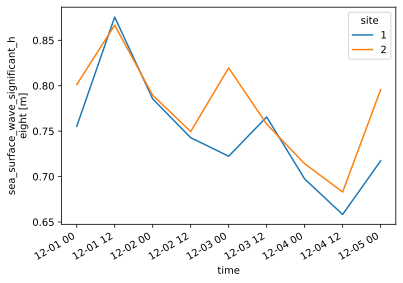

In [19]:
hs = dset.spec.hs()
hs.plot.line(x="time")
plt.draw()

In [4]:
stats = dset.spec.stats(
    ["hs", "hmax", "tp", "tm01", "tm02", "dpm", "dm", "dspr", "swe"]
)
stats

<xarray.Dataset>
Dimensions:  (site: 2, time: 9)
Coordinates:
  * site     (site) int32 1 2
  * time     (time) datetime64[ns] 2014-12-01 2014-12-01T12:00:00 ... 2014-12-05
Data variables:
    hs       (time, site) float64 dask.array<chunksize=(9, 2), meta=np.ndarray>
    hmax     (time, site) float64 dask.array<chunksize=(9, 2), meta=np.ndarray>
    tp       (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    tm01     (time, site) float64 dask.array<chunksize=(9, 2), meta=np.ndarray>
    tm02     (time, site) float64 dask.array<chunksize=(9, 2), meta=np.ndarray>
    dpm      (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    dm       (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    dspr     (time, site) float64 dask.array<chunksize=(9, 2), meta=np.ndarray>
    swe      (time, site) float64 dask.array<chunksize=(9, 2), meta=np.ndarray>
Attributes:
    standard_name:  sea_surface_wave_significant_height
    units:          m

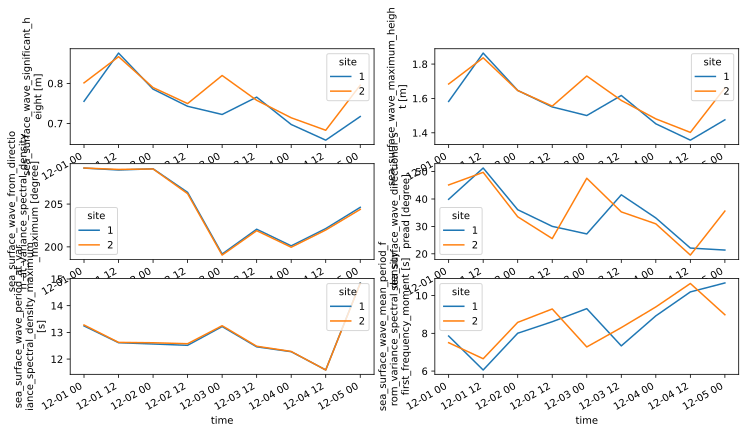

In [5]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 6))

stats.hs.plot.line(ax=ax1, x="time")
ax1.set_xlabel('Hs(m)')

stats.hmax.plot.line(ax=ax2, x="time")
stats.dpm.plot.line(ax=ax3, x="time")
stats.dspr.plot.line(ax=ax4, x="time")
stats.tp.plot.line(ax=ax5, x="time")
stats.tm01.plot.line(ax=ax6, x="time")

plt.show()

In [6]:
fcut = 1 / 8

In [7]:
sea = dset.spec.split(fmin=fcut)

In [8]:
swell = dset.spec.split(fmax=fcut)

In [9]:
dset.freq.values

array([0.04118   , 0.045298  , 0.0498278 , 0.05481058, 0.06029164,
       0.06632081, 0.07295289, 0.08024818, 0.08827299, 0.09710029,
       0.10681032, 0.11749136, 0.1292405 , 0.14216454, 0.15638101,
       0.17201911, 0.18922101, 0.20814312, 0.22895744, 0.25185317,
       0.27703848, 0.30474234, 0.3352166 , 0.36873826, 0.40561208],
      dtype=float32)

In [10]:
sea.freq.values

array([0.125     , 0.1292405 , 0.14216454, 0.15638101, 0.17201911,
       0.18922101, 0.20814312, 0.22895744, 0.25185317, 0.27703848,
       0.30474234, 0.33521661, 0.36873826, 0.40561208])

In [11]:
swell.freq.values

array([0.04118   , 0.045298  , 0.0498278 , 0.05481058, 0.06029164,
       0.06632081, 0.07295289, 0.08024818, 0.08827299, 0.09710029,
       0.10681032, 0.11749136, 0.125     ])

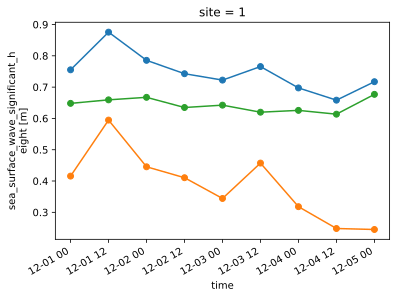

In [12]:
dset.spec.hs().isel(site=0).plot(label='Full spectrum', marker='o')
sea.spec.hs().isel(site=0).plot(label='Sea', marker='o')
swell.spec.hs().isel(site=0).plot(label='Swell', marker='o')
plt.draw()

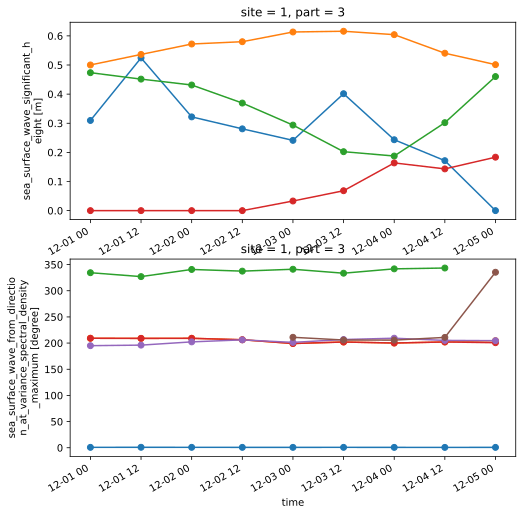

In [20]:
dspart = dset.spec.partition(dset.wspd, dset.wdir, dset.dpt)
pstats = dspart.spec.stats(["hs", "dpm"])
pstats

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
hs.isel(site=0).plot(ax=ax2, label='Full spectrum', marker='o')
pstats.hs.isel(part=0, site=0).plot(ax=ax1, label='Partition 0 (sea)', marker='o')
pstats.hs.isel(part=1, site=0).plot(ax=ax1, label='Partition 1 (swell 1)', marker='o')
pstats.hs.isel(part=2, site=0).plot(ax=ax1, label='Partition 2 (swell 2)', marker='o')
pstats.hs.isel(part=3, site=0).plot(ax=ax1, label='Partition 3 (swell 3)', marker='o')
dset.spec.dpm().isel(site=0).plot(ax=ax2, label='Full spectrum', marker='o')
pstats.dpm.isel(part=0, site=0).plot(ax=ax2, label='Partition 0 (sea)', marker='o')
pstats.dpm.isel(part=1, site=0).plot(ax=ax2, label='Partition 1 (swell 1)', marker='o')
pstats.dpm.isel(part=2, site=0).plot(ax=ax2, label='Partition 2 (swell 2)', marker='o')
pstats.dpm.isel(part=3, site=0).plot(ax=ax2, label='Partition 3 (swell 3)', marker='o')
plt.show()

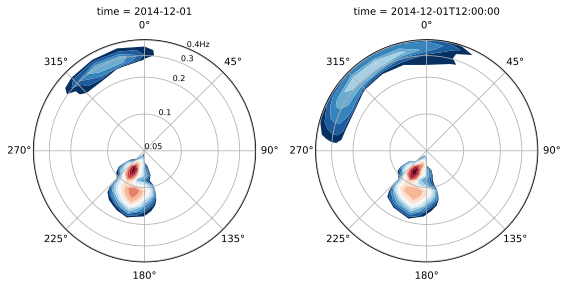

In [18]:
ds = dset.isel(site=0, time=[0, 1]).spec.split(fmin=0.05, fmax=2.0)

ds.spec.plot(
     kind="contourf",
     col="time",
     as_period=False,
     normalised=True,
     logradius=True,
     add_colorbar=False,
     figsize=(8, 5));